## 0. Preperation

- Install latest version of SAHI and Torchvision:

In [1]:
!pip install -U git+https://github.com/obss/sahi
!pip install torch torchvision

  Cloning https://github.com/obss/sahi to /tmp/pip-req-build-_s6fbbls
  Running command git clone --filter=blob:none --quiet https://github.com/obss/sahi /tmp/pip-req-build-_s6fbbls
  Resolved https://github.com/obss/sahi to commit f75f04a9ab66e7e5d7517bc3e43fd6f0dfaf4a65
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for sahi: filename=sahi-0.11.16-py3-none-any.whl size=112529 sha256=92948f2ccede5b81181dfc7b30fa46251bd91a230e1c19443602805e4a06676b
  Stored in directory: /tmp/pip-ephem-wheel-cache-_ceiomt3/wheels/98/58/04/92e120b455ac40852ecb8b78379798f550271283238b1ca99c
Successfully built sahi
  Attempting uninstall: sahi
    Found existing installation: sahi 0.11.15
    Uninstalling sahi-0.11.15:
      Successfully uninstalled sahi-0.11.15


In [2]:
import os
os.getcwd()

'/home/mandip/Github/sahi/demo'

- Import required modules:

In [3]:
# import required functions, classes
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction, predict, get_prediction
from sahi.utils.file import download_from_url
from sahi.utils.cv import read_image
from IPython.display import Image

In [4]:
# set torchvision FasterRCNN model
import torchvision
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

/home/mandip/Github/sahi/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/mandip/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:44<00:00, 3.77MB/s] 


## 1. Standard Inference with a Torchvision Model

- Instantiate a torchvision model by defining model weight path, confing path and other parameters:

In [5]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='torchvision',
    model=model,
    confidence_threshold=0.5,
    image_size=640,
    device="cpu", # or "cuda:0"
    load_at_init=True,
)


- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [6]:
result = get_prediction("demo_data/M6 377 2A J33.jpeg", detection_model)

[W NNPACK.cpp:61] Could not initialize NNPACK! Reason: Unsupported hardware.


- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [5]:
result = get_prediction(read_image("demo_data/M6 377 2A J33.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

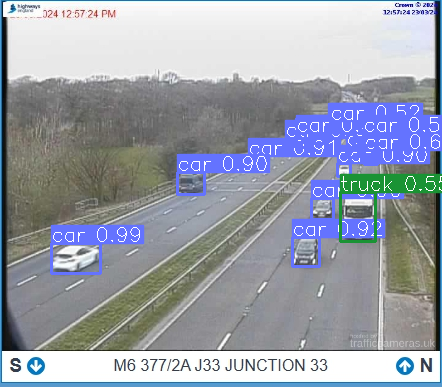

In [7]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a TorchVision Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [8]:
result = get_sliced_prediction(
    "demo_data/M6 377 2A J33.jpeg",
    detection_model,
    slice_height = 320,
    slice_width = 320,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
)

Performing prediction on 4 slices.


- Visualize predicted bounding boxes and masks over the original image:

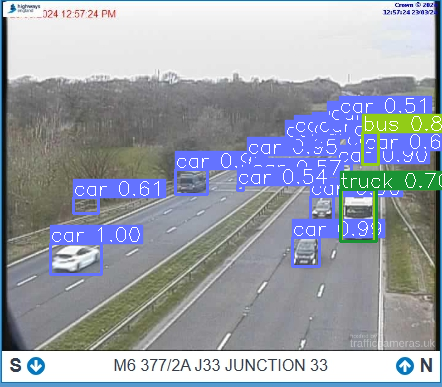

In [9]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [10]:
object_prediction_list = result.object_prediction_list

In [11]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(50.115562438964844, 243.21253967285156, 101.19181060791016, 274.1153869628906), w: 51.07624816894531, h: 30.902847290039062>,
    mask: None,
    score: PredictionScore: <value: 0.9955751895904541>,
    category: Category: <id: 3, name: car>>

In [12]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [50.115562438964844,
   243.21253967285156,
   51.07624816894531,
   30.902847290039062],
  'score': 0.9955751895904541,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1578},
 {'image_id': None,
  'bbox': [292.3549499511719,
   237.08352661132812,
   27.391860961914062,
   29.591766357421875],
  'score': 0.9854688048362732,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 810},
 {'image_id': None,
  'bbox': [175.78156661987305,
   169.2807159423828,
   31.229862213134766,
   25.711883544921875],
  'score': 0.9538202881813049,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 802}]

In [12]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [319, 317, 64, 48],
  'score': 0.9990589022636414,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 3072},
 {'image_id': 1,
  'bbox': [448, 305, 47, 39],
  'score': 0.9988724589347839,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1833},
 {'image_id': 1,
  'bbox': [762, 252, 32, 32],
  'score': 0.996906578540802,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1024}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [ ]:
!pip install -U imantics

In [13]:
result.to_imantics_annotations()[:3]

## 4. Batch Prediction

- Set model and directory parameters:

In [15]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
detection_model = AutoDetectionModel.from_pretrained(
    model_type='torchvision',
    model=model,
    confidence_threshold=0.4,
    image_size=640,
    device="cpu", # or "cuda:0"
    load_at_init=True,
)

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [16]:
predict(
    detection_model=detection_model,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/3 [00:00<?, ?it/s]

Performing prediction on 20 number of slices.


Performing inference on images:  33%|███▎      | 1/3 [00:01<00:03,  1.98s/it]

Prediction time is: 1932.06 ms
Performing prediction on 15 number of slices.


Performing inference on images:  67%|██████▋   | 2/3 [00:03<00:01,  1.47s/it]

Prediction time is: 1055.54 ms
Performing prediction on 15 number of slices.


Performing inference on images: 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]

Prediction time is: 1078.43 ms
Prediction results are successfully exported to runs/predict/exp13
